<a href="https://colab.research.google.com/github/adhamahmed2021/Ahmed-Data-Science/blob/main/Adham_Ahmed_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb #wandb is a library that facilitates weights and biases
!apt-get install poppler-utils 
!pip install pdf2image #converts pdf files into images 
!pip install flashtorch 
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #imports and formats the google slides presentation
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #extracts the images in the slides
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1XTFbKUgD1FWvh0kNna4OXPEULks3v9OSW8mFapB__0o/edit#slide=id.g1a1a0967d00_0_0" #the link to the google slides presentation

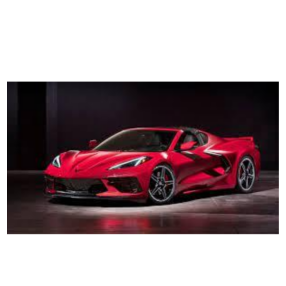

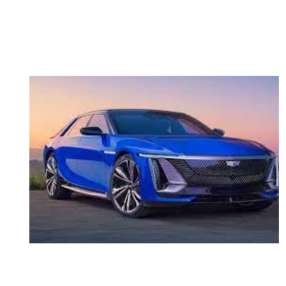

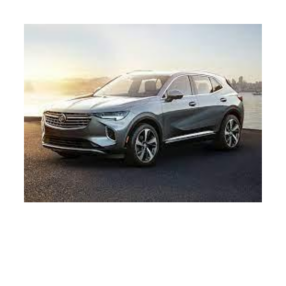

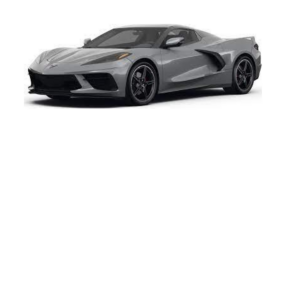

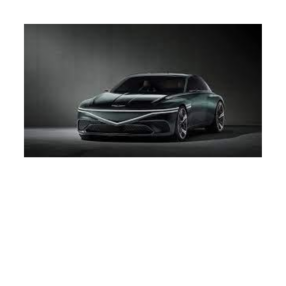

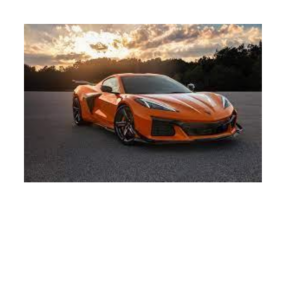

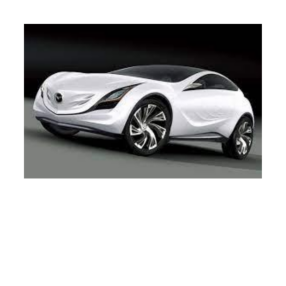

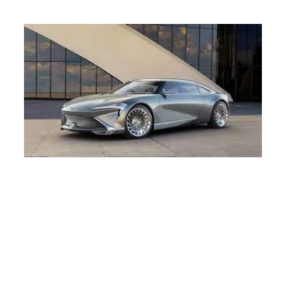

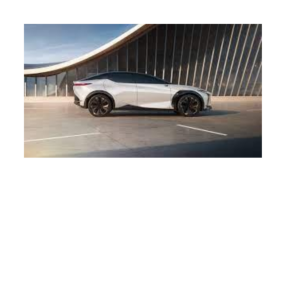

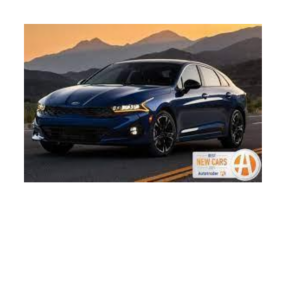

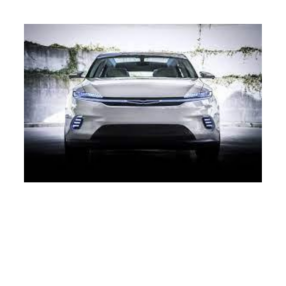

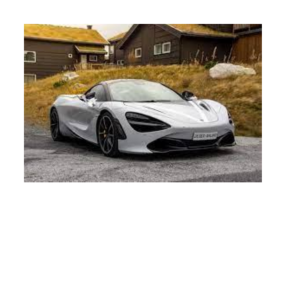

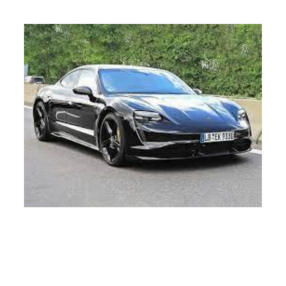

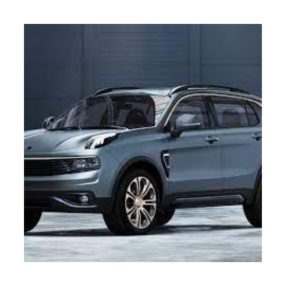

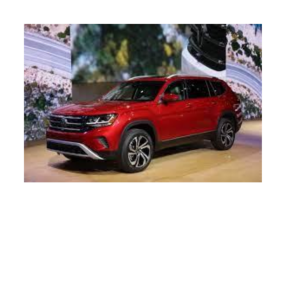

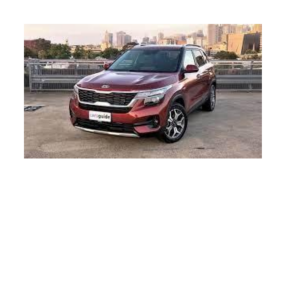

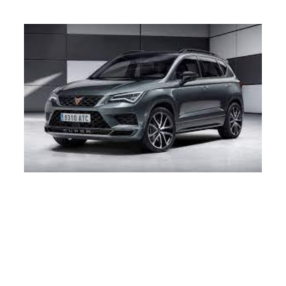

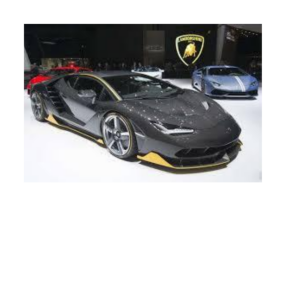

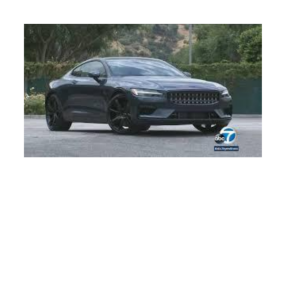

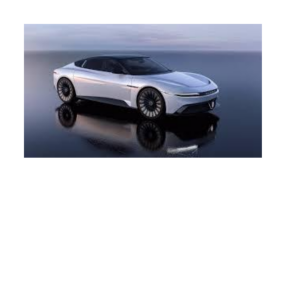

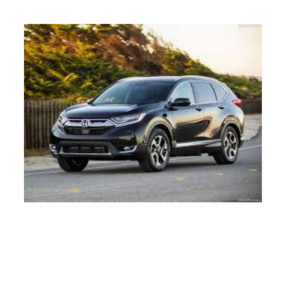

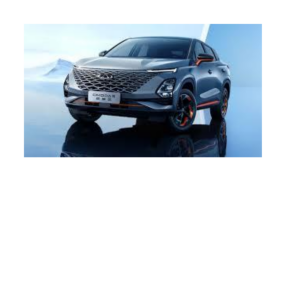

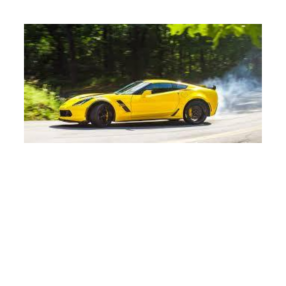

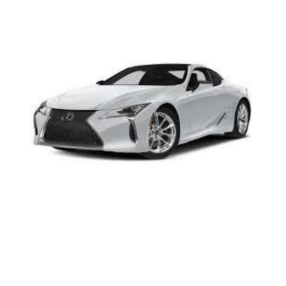

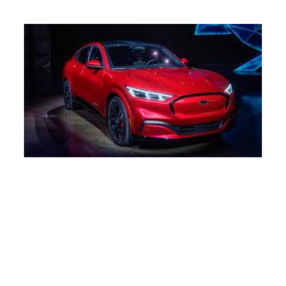

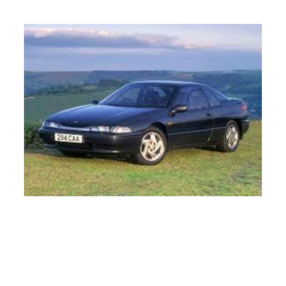

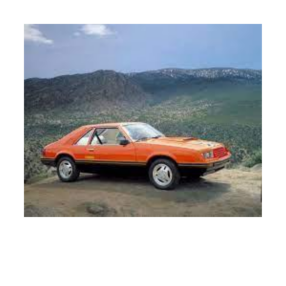

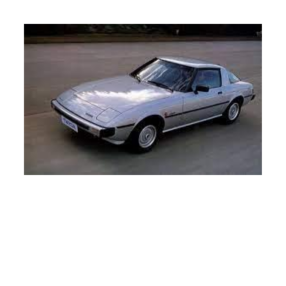

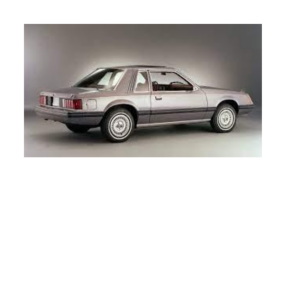

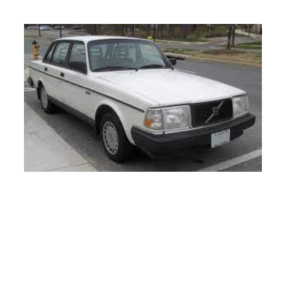

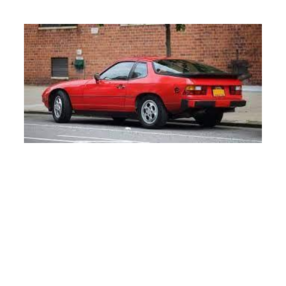

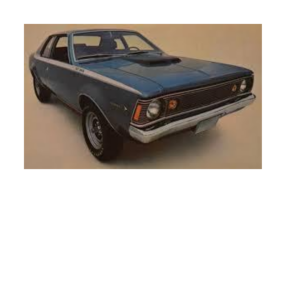

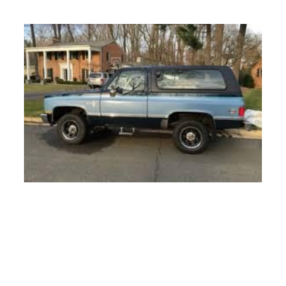

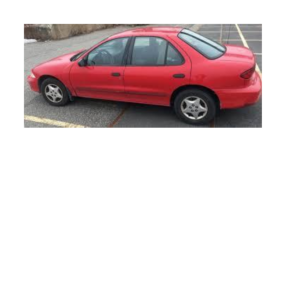

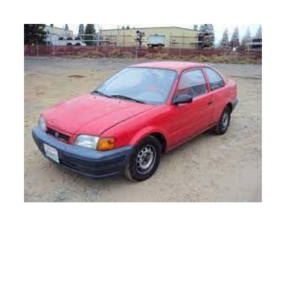

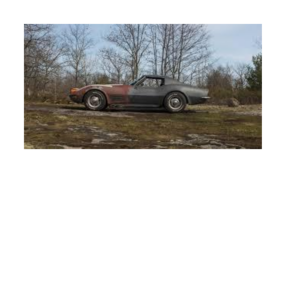

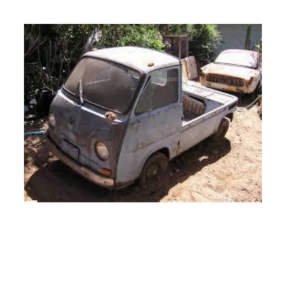

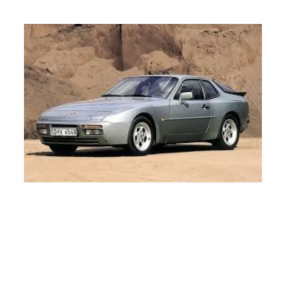

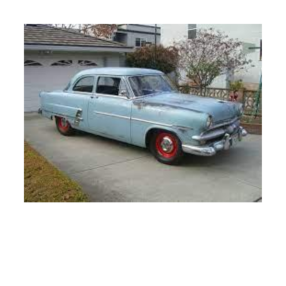

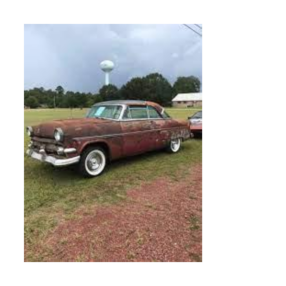

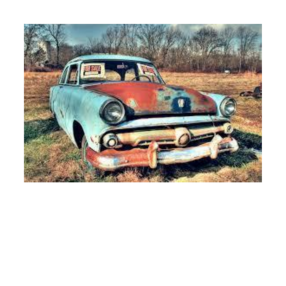

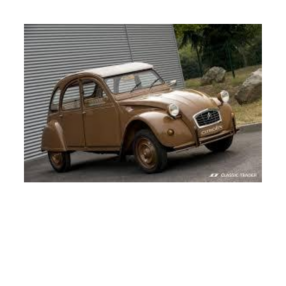

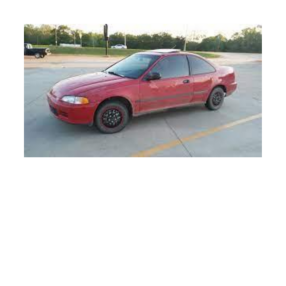

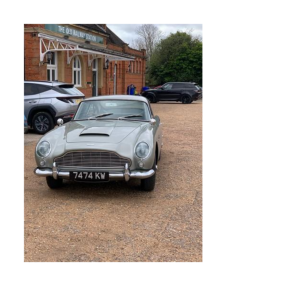

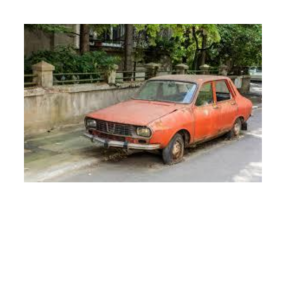

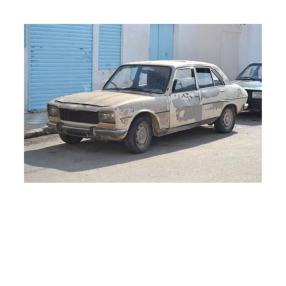

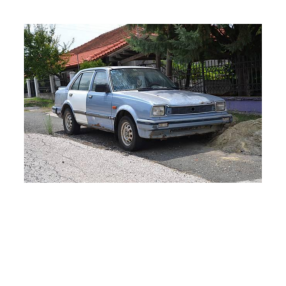

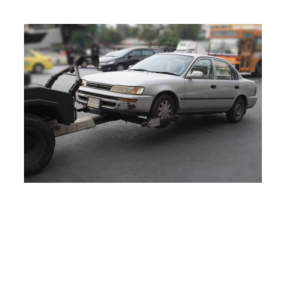

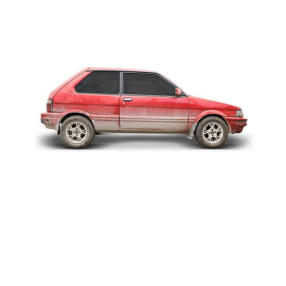

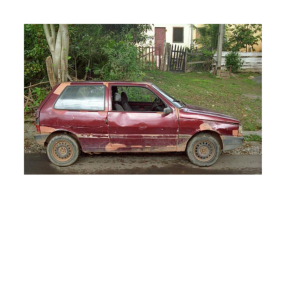

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images) #extracts images from the slides

In [ ]:
images.shape #50 images, 3 channels, 224x224 image size

torch.Size([50, 3, 224, 224])

In [ ]:
model(images) #displays the images in number form

tensor([[-4.0497, -2.0310, -3.7673,  ..., -4.3857, -1.4694,  0.2215],
        [-1.4021, -3.3176, -1.0466,  ..., -3.9024, -0.8063,  2.1133],
        [-2.1001, -4.5132, -2.2384,  ..., -5.4043,  0.3735,  3.0635],
        ...,
        [-1.0658, -5.6806, -3.3402,  ..., -5.2499, -1.4889,  0.6371],
        [-0.5359, -1.5694, -4.2135,  ..., -5.6503,  2.0619,  2.5502],
        [-3.9179, -5.0155, -2.4344,  ..., -1.9884,  0.4432,  0.3848]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape #50 images with 1000 channels

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses): #computer guesses what each image is showing
    print(labels[i])

sports car, sport car
sports car, sport car
convertible
can opener, tin opener
hair slide
pretzel
sports car, sport car
limousine, limo
marimba, xylophone
sports car, sport car
limousine, limo
limousine, limo
sports car, sport car
convertible
convertible
go-kart
convertible
go-kart
minivan
can opener, tin opener
sports car, sport car
reflex camera
sports car, sport car
convertible
sports car, sport car
convertible
convertible
iPod
convertible
limousine, limo
convertible
CD player
jeep, landrover
sports car, sport car
convertible
freight car
half track
convertible
limousine, limo
convertible
chain saw, chainsaw
convertible
sports car, sport car
convertible
snowplow, snowplough
pickup, pickup truck
limousine, limo
moving van
car wheel
convertible


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1 #displays each category as a 0 or a 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() #detaches tensor from computational graph

In [ ]:
X.shape

(50, 1000)

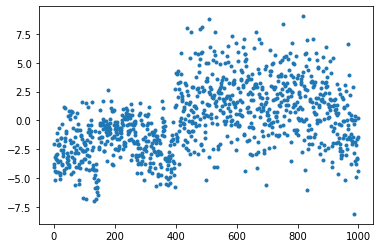

In [ ]:
plt.plot(X[0],'.') #plots all detached tensors

In [ ]:
X[0] #all values on the plot

array([-4.04969501e+00, -2.03104854e+00, -3.76733923e+00, -5.15779448e+00,
       -4.37628937e+00, -3.21524715e+00, -4.50863552e+00, -3.31558228e+00,
       -2.96614289e+00, -2.94771004e+00, -1.09300101e+00, -3.41782284e+00,
       -1.71010876e+00, -3.57858229e+00, -4.49649763e+00, -2.15619087e+00,
       -6.55845106e-01, -2.12636852e+00, -2.04749274e+00, -3.56640434e+00,
       -5.12889767e+00, -4.61396074e+00, -4.74047947e+00, -1.51353788e+00,
       -2.57951736e+00, -1.55671215e+00, -3.79903936e+00, -3.91208792e+00,
       -3.55589241e-01, -2.58817554e+00, -3.09334397e+00, -2.87421274e+00,
       -2.26676559e+00, -4.57876158e+00,  1.20297480e+00, -4.29895210e+00,
        1.10805082e+00, -1.55789900e+00, -1.77750087e+00, -8.80869150e-01,
       -1.07463932e+00, -4.10767984e+00, -3.28857780e+00, -2.83322072e+00,
       -3.59844112e+00,  3.74428183e-01, -3.76119351e+00, -3.47792983e+00,
       -3.05178738e+00, -3.88199615e+00, -4.01312637e+00,  8.33028257e-01,
        4.32579577e-01,  

In [ ]:
np.argmax(X[0]) 

817

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i]) #the 10 labels that were printed the most

sports car, sport car
convertible
racer, race car, racing car
CD player
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
car wheel
digital clock
bobsled, bobsleigh, bob
monitor
hair slide


In [ ]:
labels #all labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  6.,  33., 119., 207., 226., 179., 129.,  60.,  31.,  10.]),
 array([-8.1287565 , -6.4105353 , -4.692314  , -2.9740932 , -1.2558721 ,
         0.46234894,  2.1805701 ,  3.898791  ,  5.617012  ,  7.335233  ,
         9.053454  ], dtype=float32),
 <a list of 10 Patch objects>)

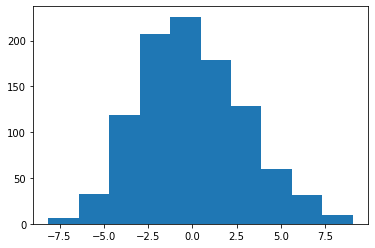

In [ ]:
plt.hist(X[0]) #puts all X  values on a histogram

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x): #softmax is a function used for classification
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):    #cross entropy is also used for classification of 2 or more classes         
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #creates normal distribution without extreme outliers

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


KeyboardInterrupt: ignored

Best run: 81.25%

Worst Run: 68.75%

Average: 77.08%

https://tensorspace.org/